# With a good 3D solution, calculate the values of $J$ and $U_1$, $U_2$:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import constants as const
from scipy import sparse
from scipy.integrate import simpson
import pickle

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si

Import solution:

In [4]:
timecode = "2025-03-19_11-05-43"

data = np.load(f"data/{timecode}_results.npz",allow_pickle=True)
for key in data.keys():
    globals()[key] = data[key]

ham = sparse.load_npz(f"data/{timecode}_hamiltonian.npz")

with open(f"data/{timecode}_trap.npz", 'rb') as file:
    trap = pickle.load(file)

In [45]:
omega_z1 = sp.sqrt(4*trap.power_tweezer1*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer1**3
omega_z2 = sp.sqrt(4*trap.power_tweezer2*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer2**3

omega_r1 = sp.sqrt(2*trap.power_tweezer1*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer1**2
omega_r2 = sp.sqrt(2*trap.power_tweezer2*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer2**2

print(f"omega_r1: {float(trap.subs(omega_r1)):.1f}Hz, omega_r2: {float(trap.subs(omega_r2)):.1f}Hz")
print(f"omega_z1: {float(trap.subs(omega_z1)):.1f}Hz, omega_z2: {float(trap.subs(omega_z2)):.1f}Hz")

omega_r1: 13361.1Hz, omega_r2: 13361.1Hz
omega_z1: 1454.4Hz, omega_z2: 1454.4Hz


Check how it looks:

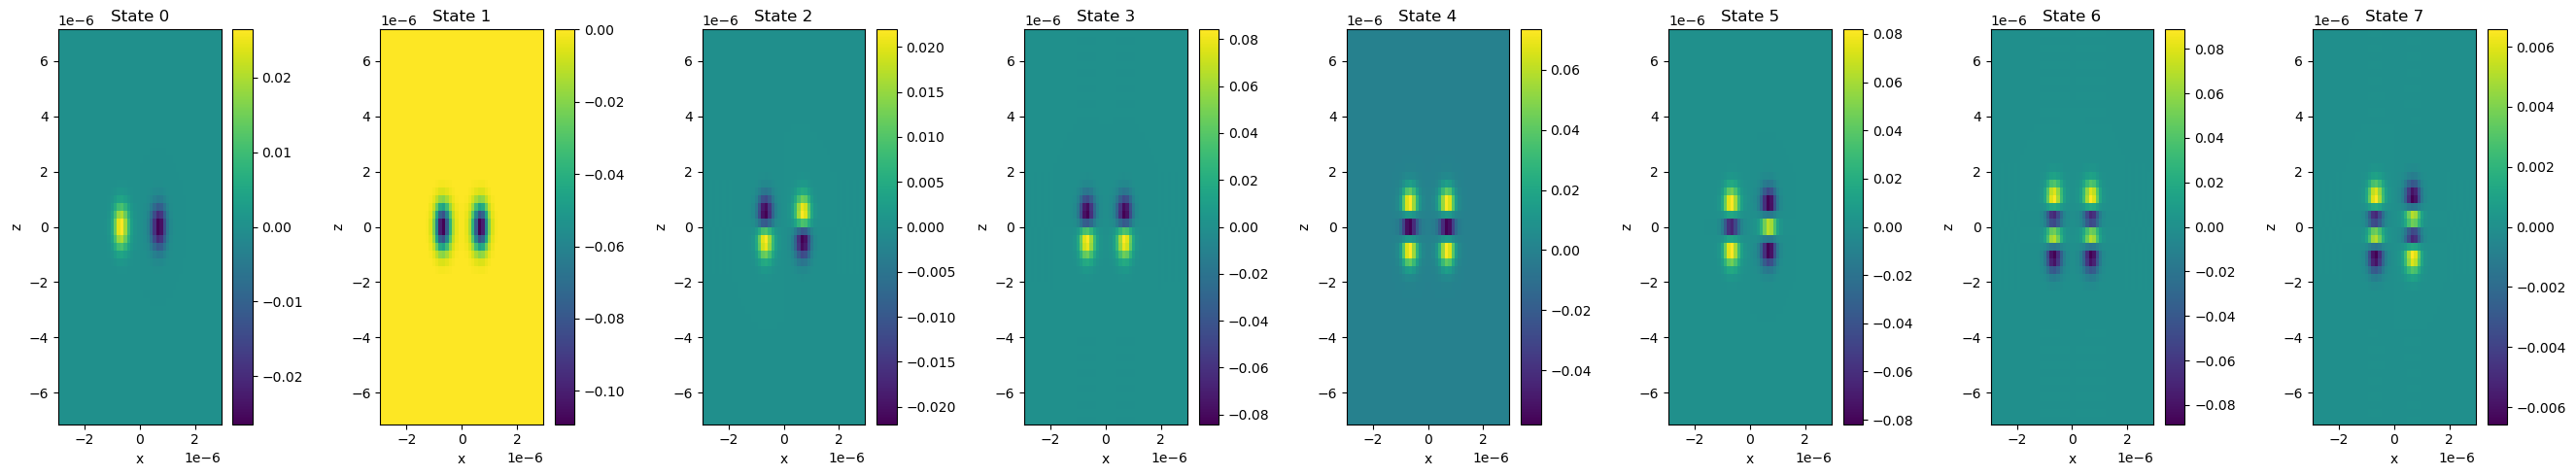

In [7]:
n_states = 8

states_plot = states.real
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number, :, int(len(y)/2), :].T,
                   extent=[*extend[0], *extend[2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


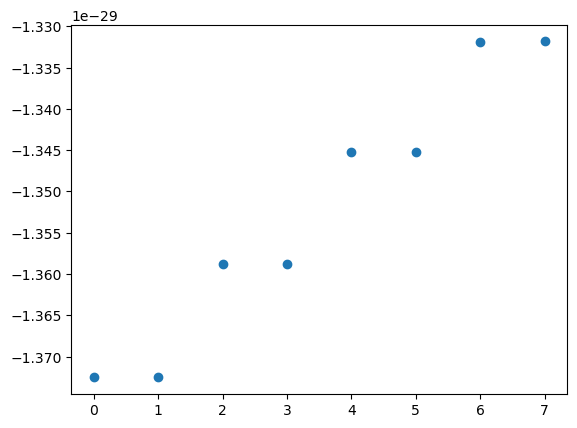

In [15]:
plt.plot(energies,"o")
plt.show()

## Normalise the states to give 1 over 3D integral:

In [4]:
states /= np.sqrt(np.prod(dvol))

In [5]:
#check if normalisation is correct

integrand  = np.abs(states[0])**2

integral_z = simpson(integrand, dx=dvol[2], axis=2)
integral_y = simpson(integral_z, dx=dvol[1], axis=1)
total_integral = simpson(integral_y, dx=dvol[0], axis=0)

total_integral

1.0000121523186054

In [6]:
#just suming gives almost the same result
np.sum(integrand)*np.prod(dvol)

1.0000000000000013

## Find wavefunctions that are localised in each well

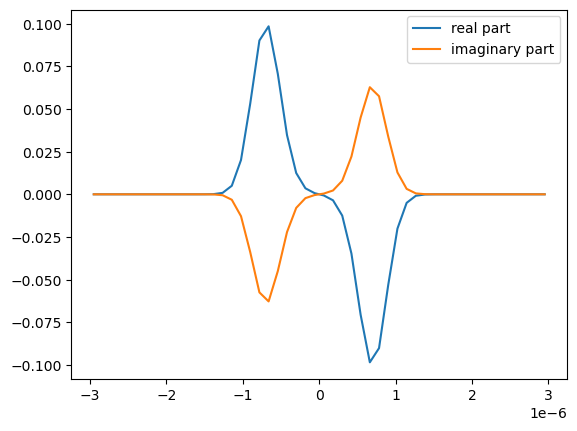

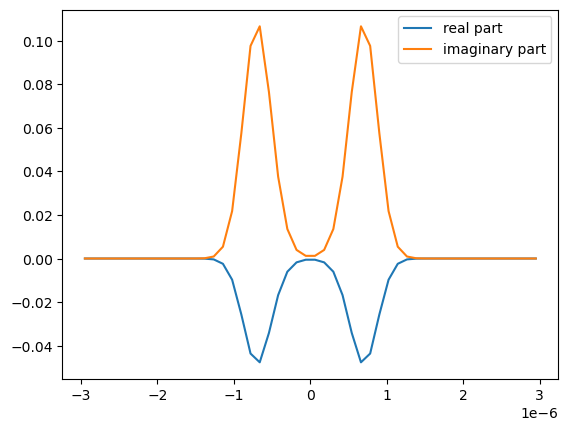

In [12]:
state_number = 0
phase_mult0 = np.exp(-1.91*1j)

plt.plot(x,(phase_mult0*states[state_number,:,int(len(y)/2),int(len(z)/2)]).real, label="real part")
plt.plot(x,(phase_mult0*states[state_number,:,int(len(y)/2),int(len(z)/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

state_number = 1
phase_mult1 = np.exp((-0.791)*1j)

plt.plot(x,(phase_mult1*states[state_number,:,int(len(y)/2),int(len(z)/2)]).real, label="real part")
plt.plot(x,(phase_mult1*states[state_number,:,int(len(y)/2),int(len(z)/2)]).imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

In [ ]:
theta = np.deg2rad(45)

GS_left = (np.cos(theta)*states[0] + np.sin(theta)*states[1])
GS_left /= np.sqrt(np.sum(np.abs(GS_left)**2)*np.prod(dvol))

GS_right = (np.sin(theta)*states[0] - np.cos(theta)*states[1])
GS_right /= np.sqrt(np.sum(np.abs(GS_right)**2)*np.prod(dvol))

In [9]:
GS_left = (phase_mult0*states[0] - phase_mult1*states[1])
GS_left /= np.sqrt(np.sum(np.abs(GS_left)**2)*np.prod(dvol))

GS_right = (phase_mult0*states[0] + phase_mult1*states[1])
GS_right /= np.sqrt(np.sum(np.abs(GS_right)**2)*np.prod(dvol))

In [69]:
state_S = states[1].real
state_S /= np.sqrt(np.sum(np.abs(state_S)**2)*np.prod(dvol))

state_A = states[0].real
state_A /= np.sqrt(np.sum(np.abs(state_A)**2)*np.prod(dvol))


GS_left = (state_S - state_A)
GS_left /= np.sqrt(2)#np.sqrt(np.sum(np.abs(GS_left)**2)*np.prod(dvol))

GS_right = (state_S + state_A)/np.sqrt(2)
GS_right /= np.sqrt(2)#np.sqrt(np.sum(np.abs(GS_right)**2)*np.prod(dvol))

In [88]:
test = np.reshape(functional_hamiltonian(dvol, pot, mass)(np.reshape(states[1], -1)),size)/energies[1]

In [80]:
test = np.reshape(ham @ np.reshape(states[1], -1),size)/energies[1]

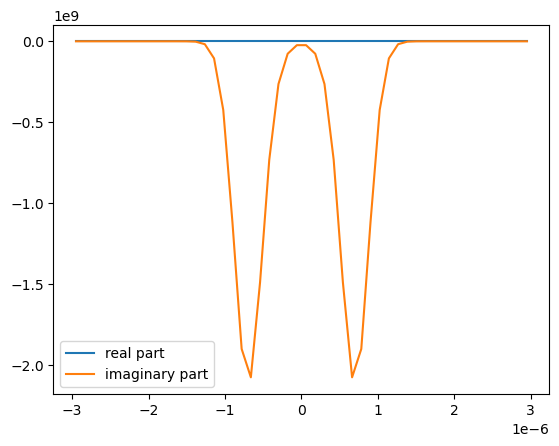

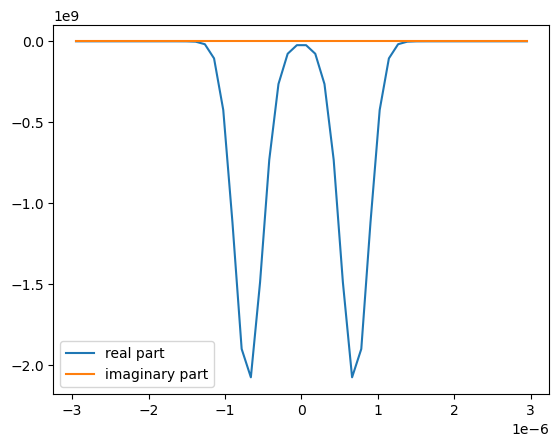

In [89]:
plt.plot(x,(states[1]-test)[:,int(len(y)/2),int(len(z)/2)].real, label="real part")
plt.plot(x,(states[1])[:,int(len(y)/2),int(len(z)/2)].real, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

plt.plot(x,state_S[:,int(len(y)/2),int(len(z)/2)].real, label="real part")
plt.plot(x,state_S[:,int(len(y)/2),int(len(z)/2)].imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

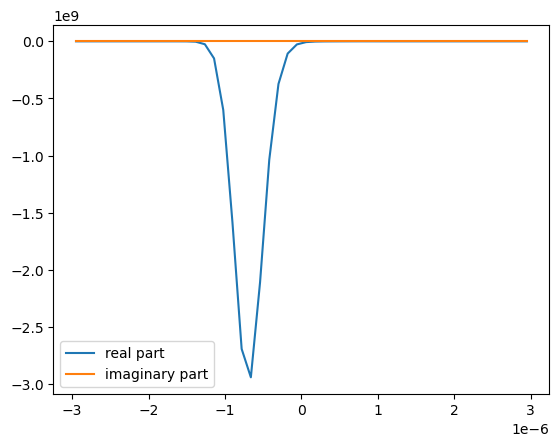

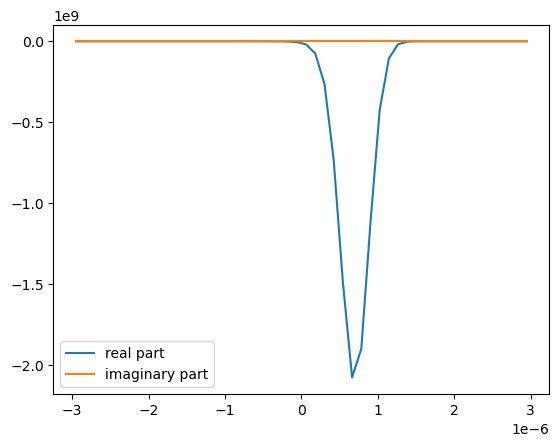

In [71]:
plt.plot(x,GS_left[:,int(len(y)/2),int(len(z)/2)].real, label="real part")
plt.plot(x,GS_left[:,int(len(y)/2),int(len(z)/2)].imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

plt.plot(x,GS_right[:,int(len(y)/2),int(len(z)/2)].real, label="real part")
plt.plot(x,GS_right[:,int(len(y)/2),int(len(z)/2)].imag, label="imaginary part")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()

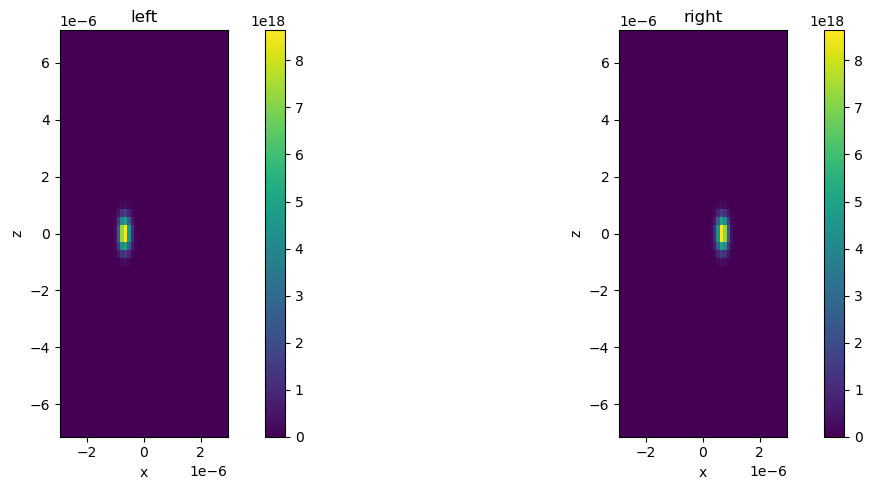

In [23]:
#state_plot = GS_left.real
#state_plot = GS_left.imag
state_plot1 = np.abs(GS_left)**2

state_plot2 = np.abs(GS_right)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, ax = plt.subplots(1, 2, figsize=(10/6*n_states, 5))  # Adjust the size as needed

# Slice through the y-direction and rotate the x-z plane (by swapping x and z)
im = ax[0].imshow(state_plot1[ :, int(len(y)/2), :].T,
                extent=[*extend[0], *extend[2]], origin="lower",
                vmin=np.min(state_plot1), vmax=np.max(state_plot1))

# Set labels
ax[0].set_xlabel("x")
ax[0].set_ylabel("z")
ax[0].set_title(f"left")
fig.colorbar(im, ax=ax[0])

im = ax[1].imshow(state_plot2[ :, int(len(y)/2), :].T,
                extent=[*extend[0], *extend[2]], origin="lower",
                vmin=np.min(state_plot2), vmax=np.max(state_plot2))

# Set labels
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")
ax[1].set_title(f"right")
fig.colorbar(im, ax=ax[1])  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Calculate results:

In [64]:
def get_J(state_left, state_right, hamiltonian, dvol):
    """
    Calculates the single-particle hopping amplitude between
    the two input states, which normally should be lowest energy states of
    the two wells.
    """
    #flatten the wavefunctions for calculation
    state_left_flat = state_left.reshape((-1,))
    state_right_flat = state_right.reshape((-1,))

    #calculate J
    integrand  = -state_left_flat.conj() * (hamiltonian @ state_right_flat)

    return np.sum(integrand)*np.prod(dvol)

def get_U_s(state,mass,scatter_length, dvol):
    """
    Calculates onsite interaction due to contact interaction
    """
    #integrate psi**4
    integrand = np.abs(state)**4
    total_integral = np.sum(integrand)*np.prod(dvol)

    print(total_integral)
    #add factor and return
    return 4*np.pi*const.hbar*scatter_length/mass * total_integral

def get_U_dd(state, mu, pol, dvol):
    """Calculates the onsite interaction due to dipolar interactions
        :pol (3,) array giving the direction of polarisation
    """
    
    raise Exception("not yet implemented!")
    x3D, y3D, z3D = np.meshgrid(x,y,z,indexing="ij")
    x3D_, y3D_, z3D_ = np.meshgrid(x,y,z,indexing="ij")

    location_vectors = np.vstack([x3D.flatten(), y3D.flatten(), z3D.flatten()]).T
    location_vectors_ = np.vstack([x3D.flatten(), y3D.flatten(), z3D.flatten()]).T

    integral = 0
    for i, r in enumerate(location_vectors):
        for j, r_ in enumerate(location_vectors_):
            cos_theta = ((r[0]*r_[0] + r[1]*r_[1] + r[2]*r_[2])/(r[0]**2 + r[1]**2 + r[2]**2)/(r_[0]**2 + r_[1]**2 + r_[2]**2))
            #integral += state[]

    """
    def integrand(x,y,z, x_,y_,z_):
        cos_theta = (x*x_ + y*y_ + z*z_)/((x**2 + y**2 + z**2)*(x_**2 + y_**2 + z_**2))"""
    

def get_U(state_left, state_right, hamiltonian, mass, scatter_length, mu):
    """Calculates the total onsite interaction"""
    U_s = get_U_s(state_left, state_right, hamiltonian)
    #U should be different if tweezers are not identical, use left one here
    U_dd = get_U_dd(state_left,...)
    return U_s + U_dd

In [65]:
J_Hz = get_J(GS_left, GS_right, ham, dvol) / const.h
print(f"J = {J_Hz.real}Hz    imaginary part: {J_Hz.imag}Hz")

J = -0.18035688997810906Hz    imaginary part: 0.0Hz


---------

In [66]:
a0 = const.physical_constants["Bohr radius"][0]

get_U_s(GS_left, float(trap.subs(trap.m)), 100*a0, dvol)/const.h

3.615142490815278e+18


1.4049588450401188e+35

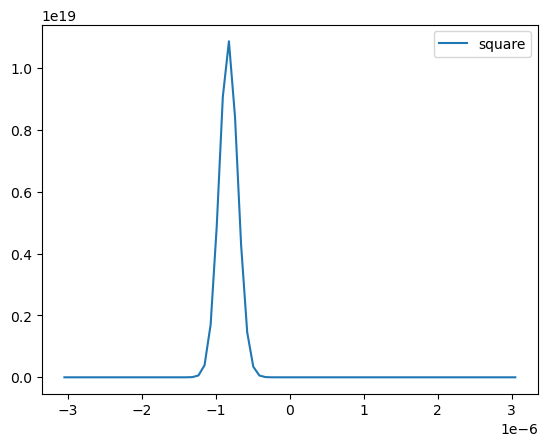

In [26]:
plt.plot(x,np.abs(GS_left[:,int(len(y)/2),int(len(z)/2)])**2, label="square")
#plt.plot(x,np.abs(GS_left[:,int(len(y)/2),int(len(z)/2)])**4, label="power 4")
#plt.plot(x,pot[:,int(len(y)/2),int(len(z)/2)], label="potential (rescaled)")
plt.legend()
plt.show()
